### Image compression with K-means
In this exercise, you will apply K-means to image compression.

In a straightforward 24-bit color representation of an image 2
 , each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of colors to 16 colors.
By making this reduction, it is possible to represent (compress) the photo in an efficient way.
Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).
In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.

Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

### 1.Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 2. Load Image

In [3]:
original_img =plt.imread('bird_small.png')

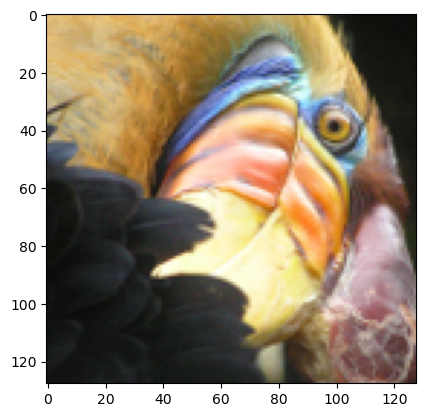

In [4]:
plt.imshow(original_img)

In [5]:
original_img.shape

(128, 128, 3)

To call the run_kMeans, you need to first transform the matrix original_img into a two-dimensional matrix.

The code below reshapes the matrix original_img to create an  𝑚×3
  matrix of pixel colors (where  𝑚=16384=128×128
 )
Note: If you'll try this exercise later on a JPG file, you first need to divide the pixel values by 255 so it will be in the range 0 to 1. This is not necessary for PNG files (e.g. bird_small.png) because it is already loaded in the required range (as mentioned in the plt.imread() documentation). We commented a line below for this so you can just uncomment it later in case you want to try a different file.

In [6]:
reshaped_img = np.reshape(original_img,(original_img.shape[0] * original_img.shape[1] ,3))
reshaped_img.shape

(16384, 3)

### 3.  K-Means on image pixels

In [7]:
def find_closest_centroid(X,centroids):
#     # first we detemine number of culster

    k = centroids.shape[0]

    indx=np.zeros(X.shape[0],dtype=int)
    
    for i in range(X.shape[0]):
        distance=[]
        for j in range(k):
            normi_j = np.linalg.norm(X[i]-centroids[j])
            distance.append(normi_j)
            # print(f"distance between traing example {i} and centroid {j} is equal {normi_j}")
        
        # print(f"distance between Traing example {i} and all centroids is {distance}")
        indx[i]=np.argmin(distance)
        # print(f"minmumn argument in distace of Traning example {i} is equal {indx[i]}")
        # print("="*50)

    return indx

In [8]:
def compute_new_centroids (X,idx,k):

    m,n= X.shape

    new_centroids =np.zeros((k,n))

    for  i in range(k):
        points = X[idx==i] 
        new_centroids[i]=np.mean(points,axis=0)

    return new_centroids

In [9]:
def k_mean(X,initial_centroids,max_iters=10):

    k = initial_centroids.shape[0]
    centroids = initial_centroids
    m,n =X.shape
    idx=np.zeros(m)

    for i in range(max_iters):

        idx = find_closest_centroid(X, centroids)
        centroids =compute_new_centroids(X,idx,k)

    
    return centroids,idx


In [10]:
def k_mean_init_centorids (X,K):

    randindex = np.random.permutation(X.shape[0])
    contorids = X[randindex[:K]]

    return contorids

In [11]:
k = 16 
max_iters= 10

intial_centroids = k_mean_init_centorids(reshaped_img,k)

centroids,idx = k_mean(reshaped_img,intial_centroids,max_iters)


In [17]:
centroids.shape

(16, 3)

In [20]:
# Find the closest centroid of each pixel
idx = find_closest_centroid(reshaped_img, centroids)
idx.shape

(16384,)

In [31]:
centroids[idx,:]

array([[0.86703074, 0.7080887 , 0.44297403],
       [0.86703074, 0.7080887 , 0.44297403],
       [0.86703074, 0.7080887 , 0.44297403],
       ...,
       [0.31765974, 0.22019616, 0.15156877],
       [0.17749865, 0.180792  , 0.1770537 ],
       [0.17749865, 0.180792  , 0.1770537 ]])

In [ ]:
# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

Text(0.5, 1.0, 'Compresd image')

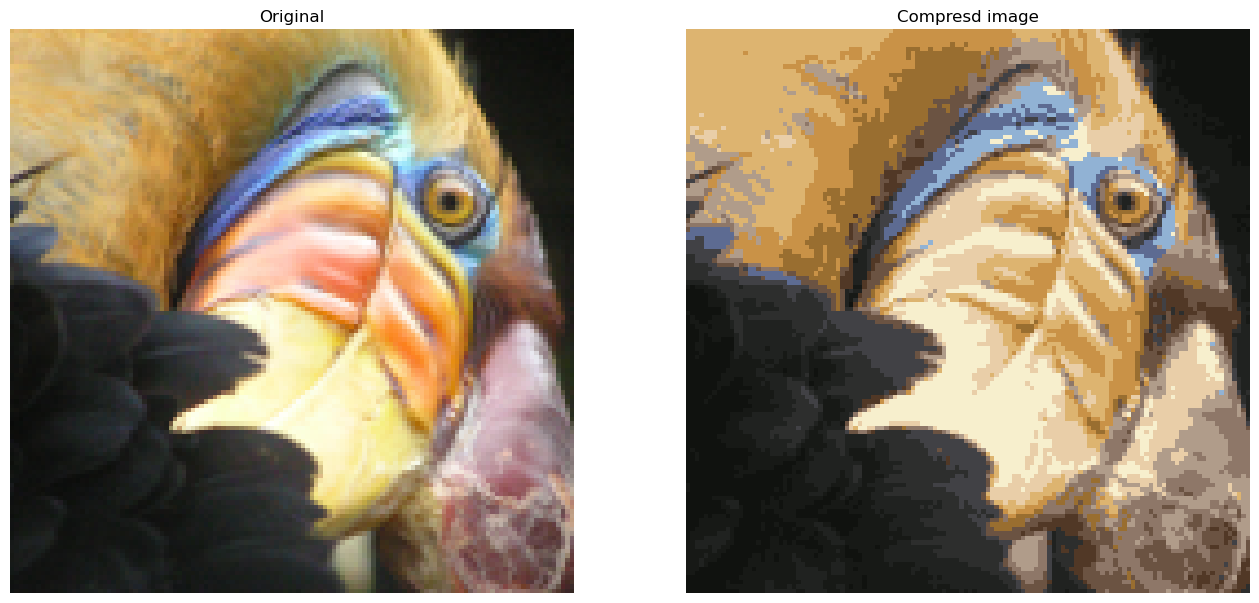

In [33]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title("Compresd image")